___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [194]:
df = pd.read_csv('Churn_Modelling.csv')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [195]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [197]:
df = df.drop(['Surname','RowNumber','CustomerId'], axis=1)

In [198]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [199]:
df.sort_values(by='EstimatedSalary') 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,709,Germany,Male,45,4,122917.710,1,1,1,11.580,1
9647,625,France,Male,31,5,0.000,2,0,1,90.070,0
9010,645,Germany,Female,59,8,121669.930,2,0,0,91.750,1
5548,710,France,Male,38,2,0.000,2,1,0,96.270,0
4989,629,France,Male,40,9,0.000,1,1,0,106.670,0
...,...,...,...,...,...,...,...,...,...,...,...
8926,620,France,Male,28,8,0.000,2,1,1,199909.320,0
9096,569,France,Male,37,9,178755.840,1,1,0,199929.170,0
4417,608,Spain,Male,27,4,153325.100,1,1,1,199953.330,0
3580,639,Germany,Female,41,5,98635.770,1,1,0,199970.740,0


In [200]:
df[df['EstimatedSalary'] < 1000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
149,416,France,Male,32,0,0.000,2,0,1,878.870,0
195,807,France,Male,35,3,174790.150,1,1,1,600.360,0
393,556,Spain,Male,38,8,0.000,2,0,0,417.410,1
396,557,France,Male,33,3,54503.550,1,1,1,371.050,0
559,850,Spain,Female,70,5,0.000,1,1,1,705.180,0
925,714,Germany,Female,36,1,101609.010,2,1,1,447.730,0
932,708,Germany,Female,42,8,192390.520,2,1,0,823.360,0
982,668,France,Male,32,7,0.000,2,1,1,777.370,0
1139,727,Spain,Female,57,1,109679.720,1,0,1,753.370,0
1451,551,France,Female,38,10,0.000,2,1,1,216.270,0


In [201]:
df.sort_values(by='CreditScore') 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8762,350,France,Female,60,3,0.000,1,0,0,113796.150,1
8723,350,France,Male,51,10,0.000,1,1,1,125823.790,1
1838,350,Germany,Male,39,0,109733.200,2,0,0,123602.110,1
9624,350,France,Female,40,0,111098.850,1,1,1,172321.210,1
1631,350,Spain,Male,54,1,152677.480,1,1,1,191973.490,1
...,...,...,...,...,...,...,...,...,...,...,...
937,850,Germany,Female,44,5,128605.320,1,0,1,171096.200,0
2980,850,Spain,Female,41,3,99945.930,2,1,0,71179.310,0
960,850,Germany,Female,31,1,108822.400,1,1,1,132173.310,0
3109,850,Germany,Female,47,10,134381.520,1,0,0,26812.890,1


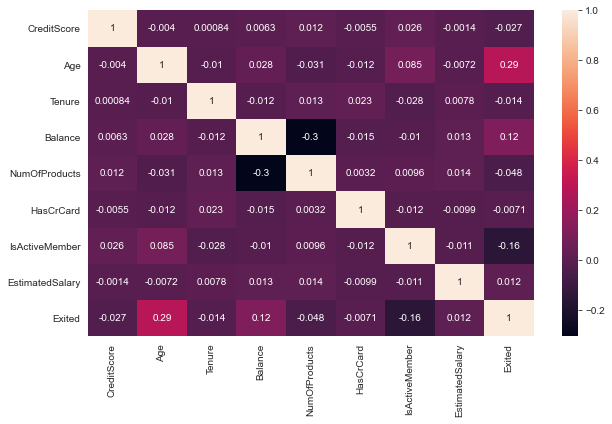

In [202]:
sns.heatmap(df.corr(), annot=True);

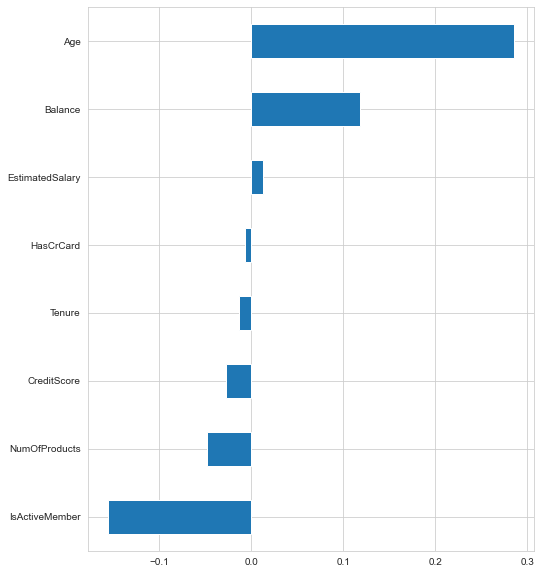

In [203]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

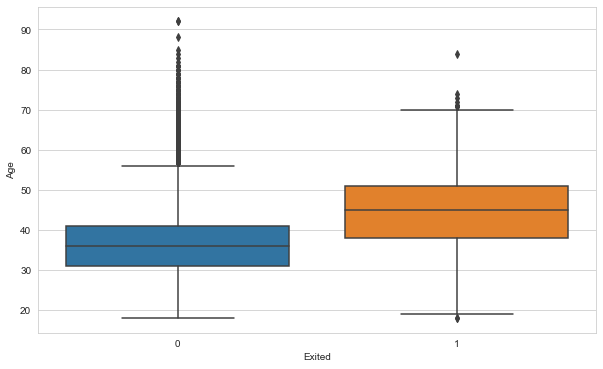

In [204]:
sns.boxplot(y = 'Age', x = 'Exited', data = df);

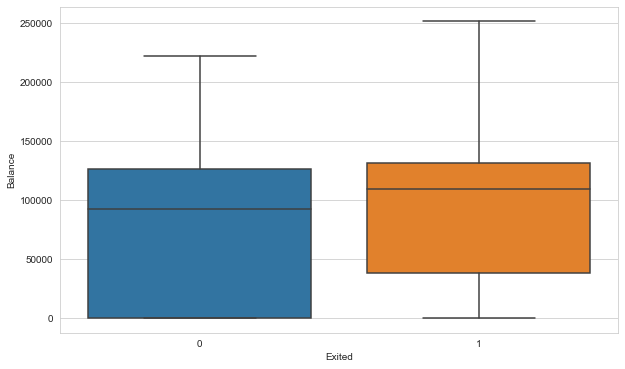

In [205]:
sns.boxplot(y = 'Balance', x = 'Exited', data = df);

In [206]:
df.groupby('Exited')['Balance'].mean()

Exited
0   72745.297
1   91108.539
Name: Balance, dtype: float64

In [207]:
df.groupby('Exited')['Age'].mean()

Exited
0   37.408
1   44.838
Name: Age, dtype: float64

In [208]:
df.groupby('Exited')['NumOfProducts'].mean()

Exited
0   1.544
1   1.475
Name: NumOfProducts, dtype: float64

In [209]:
df.groupby('Exited')['CreditScore'].mean()

Exited
0   651.853
1   645.351
Name: CreditScore, dtype: float64

In [210]:
# df['Gender']=df['Gender'].apply(lambda x : 0 if x =='Female' else 1)
# df['Geography']=df['Geography'].apply(lambda x : 0 if x =='France' else( 1 if x == 'Spain' else 2) )

In [211]:
df=pd.get_dummies(df)

In [212]:
df.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3298,558,25,10,111363.100,2,1,0,197264.350,0,0,1,0,0,1
1649,731,41,4,0.000,2,1,0,22299.270,0,0,0,1,0,1
7874,641,32,5,122947.920,1,1,1,99154.860,0,0,1,0,0,1
8760,677,34,10,171671.900,1,1,1,50777.770,0,0,0,1,1,0
1661,690,32,0,106683.520,2,1,1,137916.490,0,0,1,0,0,1
3233,595,36,6,85768.420,1,1,1,24802.770,0,0,0,1,0,1
2962,550,38,9,140278.990,3,1,1,171457.060,1,1,0,0,0,1
5690,577,39,4,0.000,2,1,0,91366.420,0,0,0,1,1,0
382,492,30,10,77168.870,2,0,1,146700.220,0,0,1,0,1,0
8372,850,44,2,112755.340,2,0,0,158171.360,0,0,1,0,0,1


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [214]:
df.shape

(10000, 14)

# Preprocessing of Data
- Train | Test Split, Scalling

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify= y, random_state=101)

In [218]:
from sklearn.preprocessing import MinMaxScaler

In [219]:
scaler = MinMaxScaler()

In [220]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [221]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [222]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [223]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [224]:
X_train.shape

(9000, 13)

## without class_weigth

### Create The Model

In [225]:
from tensorflow.keras.optimizers import Adam

In [226]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [227]:
tf.random.set_seed(1)

model = Sequential()

model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr = 0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['Recall'])


In [228]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 20)                280       
                                                                 
 dense_136 (Dense)           (None, 10)                210       
                                                                 
 dense_137 (Dense)           (None, 5)                 55        
                                                                 
 dense_138 (Dense)           (None, 1)                 6         
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [229]:
model.weights

[<tf.Variable 'dense_135/kernel:0' shape=(13, 20) dtype=float32, numpy=
 array([[-0.28557736,  0.3423844 ,  0.11169517, -0.05581927, -0.177435  ,
          0.12152618,  0.40575123, -0.05534735,  0.13653535,  0.08945549,
          0.11651975,  0.09760225,  0.33202595,  0.10895556,  0.02726841,
         -0.40424713, -0.05042192, -0.21092308,  0.32937223,  0.33028495],
        [ 0.24499458, -0.37561536, -0.36577243, -0.1633845 , -0.21219213,
          0.3483448 , -0.02432224, -0.21969469,  0.11342615,  0.07336757,
          0.34965944,  0.05981874, -0.00304061,  0.08009106,  0.03533426,
         -0.04868037, -0.17697315,  0.19950867,  0.35792464,  0.14371312],
        [-0.24211451, -0.26732486, -0.07916817, -0.41816163, -0.02935469,
         -0.1738129 ,  0.21330523,  0.01867378,  0.11694956,  0.05475619,
          0.06035361, -0.4046411 ,  0.09510291, -0.16147345, -0.00955439,
         -0.01155216, -0.37649363,  0.33921093, -0.13989356,  0.35712242],
        [ 0.12772429,  0.36590147, -0

In [230]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 200)

Epoch 1/200
60/60 [==============================] - 1s 5ms/step - loss: 0.5575 - recall: 0.0438 - val_loss: 0.4906 - val_recall: 0.0000e+00
Epoch 2/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4787 - recall: 0.0000e+00 - val_loss: 0.4769 - val_recall: 0.0000e+00
Epoch 3/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4670 - recall: 0.0000e+00 - val_loss: 0.4681 - val_recall: 0.0000e+00
Epoch 4/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4585 - recall: 0.0000e+00 - val_loss: 0.4603 - val_recall: 0.0000e+00
Epoch 5/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4513 - recall: 0.0032 - val_loss: 0.4534 - val_recall: 0.0071
Epoch 6/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4448 - recall: 0.0193 - val_loss: 0.4466 - val_recall: 0.0607
Epoch 7/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4388 - recall: 0.0657 - val_loss: 0.4384 - val_recall: 0.0929
Epoch 8/200
6

60/60 [==============================] - 0s 2ms/step - loss: 0.3327 - recall: 0.4778 - val_loss: 0.3343 - val_recall: 0.5321
Epoch 61/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3318 - recall: 0.4862 - val_loss: 0.3324 - val_recall: 0.4714
Epoch 62/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3318 - recall: 0.4849 - val_loss: 0.3338 - val_recall: 0.4464
Epoch 63/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3313 - recall: 0.4765 - val_loss: 0.3323 - val_recall: 0.5179
Epoch 64/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3329 - recall: 0.4920 - val_loss: 0.3339 - val_recall: 0.5357
Epoch 65/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3310 - recall: 0.4810 - val_loss: 0.3324 - val_recall: 0.5250
Epoch 66/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3295 - recall: 0.4926 - val_loss: 0.3377 - val_recall: 0.5500
Epoch 67/200
60/60 [===========================

60/60 [==============================] - 0s 2ms/step - loss: 0.3239 - recall: 0.4965 - val_loss: 0.3317 - val_recall: 0.4536
Epoch 120/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3227 - recall: 0.4952 - val_loss: 0.3325 - val_recall: 0.5393
Epoch 121/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3226 - recall: 0.5061 - val_loss: 0.3305 - val_recall: 0.4571
Epoch 122/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3218 - recall: 0.4900 - val_loss: 0.3317 - val_recall: 0.5500
Epoch 123/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3212 - recall: 0.4926 - val_loss: 0.3296 - val_recall: 0.5179
Epoch 124/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3240 - recall: 0.5029 - val_loss: 0.3301 - val_recall: 0.5143
Epoch 125/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3216 - recall: 0.4855 - val_loss: 0.3304 - val_recall: 0.5286
Epoch 126/200
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.3159 - recall: 0.4932 - val_loss: 0.3332 - val_recall: 0.5571
Epoch 179/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3183 - recall: 0.5061 - val_loss: 0.3322 - val_recall: 0.4571
Epoch 180/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3189 - recall: 0.4907 - val_loss: 0.3437 - val_recall: 0.6036
Epoch 181/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3181 - recall: 0.5042 - val_loss: 0.3293 - val_recall: 0.4821
Epoch 182/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3169 - recall: 0.5016 - val_loss: 0.3313 - val_recall: 0.5393
Epoch 183/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3160 - recall: 0.5074 - val_loss: 0.3293 - val_recall: 0.5000
Epoch 184/200
60/60 [==============================] - 0s 2ms/step - loss: 0.3170 - recall: 0.5003 - val_loss: 0.3286 - val_recall: 0.4857
Epoch 185/200
60/60 [====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<AxesSubplot:>

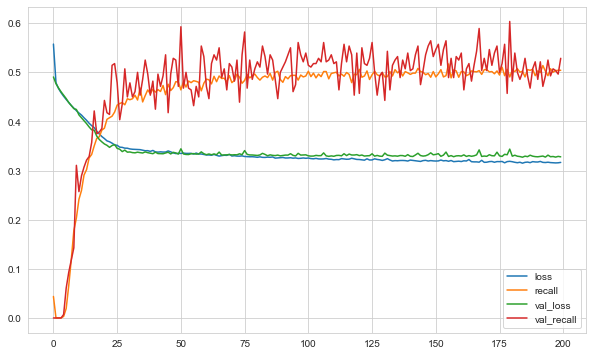

In [231]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [232]:
y_pred = (model.predict(X_test) > 0.5)
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 942us/step
[[756  40]
 [123  81]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.67      0.40      0.50       204

    accuracy                           0.84      1000
   macro avg       0.76      0.67      0.70      1000
weighted avg       0.82      0.84      0.82      1000



In [233]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

32/32 [==============================] - 0s 839us/step


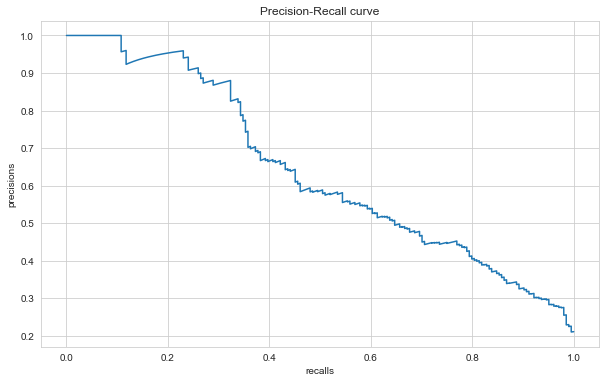

In [234]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [235]:
df['Exited'].value_counts(normalize=True)

0   0.796
1   0.204
Name: Exited, dtype: float64

In [236]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [237]:
tf.random.set_seed(1)

model = Sequential()

model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr = 0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['Recall'])

In [238]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 500, class_weight=class_weights)

Epoch 1/500
60/60 [==============================] - 1s 4ms/step - loss: 0.6735 - recall: 0.4778 - val_loss: 0.6095 - val_recall: 0.5179
Epoch 2/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6528 - recall: 0.5480 - val_loss: 0.6230 - val_recall: 0.6357
Epoch 3/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6324 - recall: 0.6169 - val_loss: 0.6160 - val_recall: 0.6607
Epoch 4/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6154 - recall: 0.6291 - val_loss: 0.6158 - val_recall: 0.6821
Epoch 5/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6011 - recall: 0.6555 - val_loss: 0.6121 - val_recall: 0.7143
Epoch 6/500
60/60 [==============================] - 0s 2ms/step - loss: 0.5868 - recall: 0.6671 - val_loss: 0.6279 - val_recall: 0.7786
Epoch 7/500
60/60 [==============================] - 0s 2ms/step - loss: 0.5769 - recall: 0.6851 - val_loss: 0.5588 - val_recall: 0.6714
Epoch 8/500
60/60 [======================

60/60 [==============================] - 0s 2ms/step - loss: 0.4537 - recall: 0.7759 - val_loss: 0.5110 - val_recall: 0.8357
Epoch 61/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4521 - recall: 0.7637 - val_loss: 0.4470 - val_recall: 0.7821
Epoch 62/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4525 - recall: 0.7656 - val_loss: 0.4258 - val_recall: 0.7286
Epoch 63/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4524 - recall: 0.7605 - val_loss: 0.4620 - val_recall: 0.7964
Epoch 64/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4553 - recall: 0.7611 - val_loss: 0.4900 - val_recall: 0.8286
Epoch 65/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4526 - recall: 0.7669 - val_loss: 0.4643 - val_recall: 0.7821
Epoch 66/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4502 - recall: 0.7740 - val_loss: 0.5025 - val_recall: 0.8286
Epoch 67/500
60/60 [===========================

60/60 [==============================] - 0s 2ms/step - loss: 0.4423 - recall: 0.7701 - val_loss: 0.4093 - val_recall: 0.7357
Epoch 120/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4404 - recall: 0.7708 - val_loss: 0.4777 - val_recall: 0.8179
Epoch 121/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4402 - recall: 0.7766 - val_loss: 0.4343 - val_recall: 0.7714
Epoch 122/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4393 - recall: 0.7708 - val_loss: 0.4843 - val_recall: 0.8179
Epoch 123/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4387 - recall: 0.7688 - val_loss: 0.4528 - val_recall: 0.8071
Epoch 124/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4429 - recall: 0.7630 - val_loss: 0.4234 - val_recall: 0.7679
Epoch 125/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4395 - recall: 0.7611 - val_loss: 0.4684 - val_recall: 0.8071
Epoch 126/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.4312 - recall: 0.7637 - val_loss: 0.5112 - val_recall: 0.8357
Epoch 179/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4356 - recall: 0.7778 - val_loss: 0.4083 - val_recall: 0.7250
Epoch 180/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4352 - recall: 0.7618 - val_loss: 0.5437 - val_recall: 0.8464
Epoch 181/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4350 - recall: 0.7727 - val_loss: 0.4622 - val_recall: 0.8000
Epoch 182/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4324 - recall: 0.7688 - val_loss: 0.4762 - val_recall: 0.8179
Epoch 183/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4310 - recall: 0.7753 - val_loss: 0.4362 - val_recall: 0.7643
Epoch 184/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4326 - recall: 0.7701 - val_loss: 0.4395 - val_recall: 0.7679
Epoch 185/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.4269 - recall: 0.7721 - val_loss: 0.4568 - val_recall: 0.7821
Epoch 238/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4308 - recall: 0.7675 - val_loss: 0.5187 - val_recall: 0.8214
Epoch 239/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4293 - recall: 0.7836 - val_loss: 0.4555 - val_recall: 0.7964
Epoch 240/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4264 - recall: 0.7733 - val_loss: 0.4705 - val_recall: 0.8071
Epoch 241/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4273 - recall: 0.7605 - val_loss: 0.4821 - val_recall: 0.8071
Epoch 242/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4282 - recall: 0.7811 - val_loss: 0.4360 - val_recall: 0.7571
Epoch 243/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4252 - recall: 0.7766 - val_loss: 0.4439 - val_recall: 0.7679
Epoch 244/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.4245 - recall: 0.7740 - val_loss: 0.4630 - val_recall: 0.7750
Epoch 297/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4226 - recall: 0.7785 - val_loss: 0.4524 - val_recall: 0.7679
Epoch 298/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4253 - recall: 0.7669 - val_loss: 0.4587 - val_recall: 0.7821
Epoch 299/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4237 - recall: 0.7804 - val_loss: 0.4525 - val_recall: 0.7643
Epoch 300/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4285 - recall: 0.7759 - val_loss: 0.5005 - val_recall: 0.8071
Epoch 301/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4215 - recall: 0.7753 - val_loss: 0.4715 - val_recall: 0.7857
Epoch 302/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4202 - recall: 0.7791 - val_loss: 0.4776 - val_recall: 0.7964
Epoch 303/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.4190 - recall: 0.7778 - val_loss: 0.4613 - val_recall: 0.7821
Epoch 356/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4182 - recall: 0.7740 - val_loss: 0.5375 - val_recall: 0.8179
Epoch 357/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4192 - recall: 0.7875 - val_loss: 0.4390 - val_recall: 0.7714
Epoch 358/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4197 - recall: 0.7817 - val_loss: 0.4819 - val_recall: 0.7893
Epoch 359/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4197 - recall: 0.7746 - val_loss: 0.4532 - val_recall: 0.7679
Epoch 360/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4227 - recall: 0.7811 - val_loss: 0.4308 - val_recall: 0.7429
Epoch 361/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4175 - recall: 0.7817 - val_loss: 0.4506 - val_recall: 0.7607
Epoch 362/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.4160 - recall: 0.7856 - val_loss: 0.4897 - val_recall: 0.8000
Epoch 415/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4173 - recall: 0.7952 - val_loss: 0.4715 - val_recall: 0.7821
Epoch 416/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4153 - recall: 0.7824 - val_loss: 0.4713 - val_recall: 0.7893
Epoch 417/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4152 - recall: 0.7856 - val_loss: 0.5025 - val_recall: 0.8107
Epoch 418/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4184 - recall: 0.7746 - val_loss: 0.5318 - val_recall: 0.8179
Epoch 419/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4183 - recall: 0.7869 - val_loss: 0.5044 - val_recall: 0.8036
Epoch 420/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4151 - recall: 0.7849 - val_loss: 0.4943 - val_recall: 0.7893
Epoch 421/500
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.4158 - recall: 0.7933 - val_loss: 0.4531 - val_recall: 0.7571
Epoch 474/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4149 - recall: 0.7798 - val_loss: 0.4739 - val_recall: 0.7857
Epoch 475/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4135 - recall: 0.7824 - val_loss: 0.4555 - val_recall: 0.7750
Epoch 476/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4132 - recall: 0.7836 - val_loss: 0.4560 - val_recall: 0.7750
Epoch 477/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4139 - recall: 0.7888 - val_loss: 0.4572 - val_recall: 0.7643
Epoch 478/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4128 - recall: 0.7804 - val_loss: 0.4325 - val_recall: 0.7357
Epoch 479/500
60/60 [==============================] - 0s 2ms/step - loss: 0.4138 - recall: 0.7875 - val_loss: 0.4670 - val_recall: 0.7607
Epoch 480/500
60/60 [====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [239]:
pd.DataFrame(model.history.history)

,loss,recall,val_loss,val_recall
0,0.674,0.478,0.610,0.518
1,0.653,0.548,0.623,0.636
2,0.632,0.617,0.616,0.661
3,0.615,0.629,0.616,0.682
4,0.601,0.656,0.612,0.714
...,...,...,...,...
495,0.415,0.788,0.449,0.754
496,0.412,0.780,0.504,0.800
497,0.419,0.779,0.435,0.746
498,0.416,0.794,0.433,0.754


<AxesSubplot:>

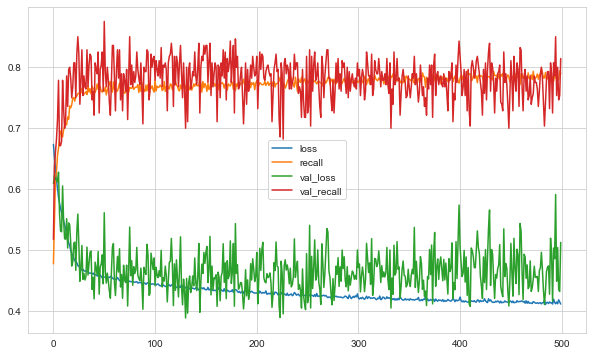

In [240]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [241]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 871us/step
[[577 219]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       796
           1       0.41      0.76      0.54       204

    accuracy                           0.73      1000
   macro avg       0.67      0.74      0.67      1000
weighted avg       0.82      0.73      0.76      1000



32/32 [==============================] - 0s 968us/step


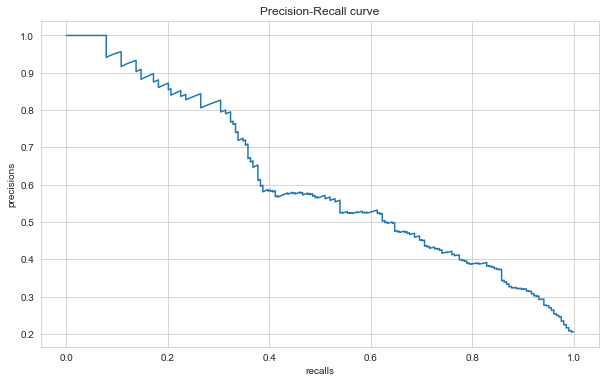

In [242]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [243]:
tf.random.set_seed(1)

model = Sequential()

model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr = 0.003)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['Recall'])

In [244]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 200, class_weight=class_weights)

Epoch 1/200
60/60 [==============================] - 1s 4ms/step - loss: 0.6589 - recall: 0.5428 - val_loss: 0.6004 - val_recall: 0.6071
Epoch 2/200
60/60 [==============================] - 0s 2ms/step - loss: 0.6132 - recall: 0.6484 - val_loss: 0.6271 - val_recall: 0.7393
Epoch 3/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5886 - recall: 0.6813 - val_loss: 0.5241 - val_recall: 0.6107
Epoch 4/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5638 - recall: 0.6929 - val_loss: 0.5720 - val_recall: 0.7500
Epoch 5/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5420 - recall: 0.7019 - val_loss: 0.5572 - val_recall: 0.7643
Epoch 6/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5252 - recall: 0.7199 - val_loss: 0.5589 - val_recall: 0.8107
Epoch 7/200
60/60 [==============================] - 0s 2ms/step - loss: 0.5056 - recall: 0.7354 - val_loss: 0.5488 - val_recall: 0.8357
Epoch 8/200
60/60 [======================

60/60 [==============================] - 0s 2ms/step - loss: 0.4383 - recall: 0.7695 - val_loss: 0.4519 - val_recall: 0.7893
Epoch 61/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4383 - recall: 0.7637 - val_loss: 0.4811 - val_recall: 0.8036
Epoch 62/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4408 - recall: 0.7663 - val_loss: 0.4003 - val_recall: 0.7000
Epoch 63/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4389 - recall: 0.7605 - val_loss: 0.4879 - val_recall: 0.8036
Epoch 64/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4399 - recall: 0.7618 - val_loss: 0.4664 - val_recall: 0.8000
Epoch 65/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4378 - recall: 0.7682 - val_loss: 0.5136 - val_recall: 0.8214
Epoch 66/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4357 - recall: 0.7688 - val_loss: 0.4988 - val_recall: 0.8071
Epoch 67/200
60/60 [===========================

60/60 [==============================] - 0s 2ms/step - loss: 0.4246 - recall: 0.7817 - val_loss: 0.4320 - val_recall: 0.7714
Epoch 120/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4263 - recall: 0.7701 - val_loss: 0.5157 - val_recall: 0.8286
Epoch 121/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4256 - recall: 0.7727 - val_loss: 0.4410 - val_recall: 0.7679
Epoch 122/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4220 - recall: 0.7843 - val_loss: 0.4800 - val_recall: 0.8000
Epoch 123/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4228 - recall: 0.7869 - val_loss: 0.4638 - val_recall: 0.8000
Epoch 124/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4279 - recall: 0.7733 - val_loss: 0.4047 - val_recall: 0.7393
Epoch 125/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4209 - recall: 0.7791 - val_loss: 0.4649 - val_recall: 0.7857
Epoch 126/200
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.4117 - recall: 0.7978 - val_loss: 0.5492 - val_recall: 0.8357
Epoch 179/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4174 - recall: 0.7952 - val_loss: 0.3993 - val_recall: 0.7000
Epoch 180/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4156 - recall: 0.7946 - val_loss: 0.5491 - val_recall: 0.8429
Epoch 181/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4171 - recall: 0.7985 - val_loss: 0.4608 - val_recall: 0.7893
Epoch 182/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4146 - recall: 0.7985 - val_loss: 0.5213 - val_recall: 0.8179
Epoch 183/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4136 - recall: 0.7952 - val_loss: 0.4439 - val_recall: 0.7500
Epoch 184/200
60/60 [==============================] - 0s 2ms/step - loss: 0.4138 - recall: 0.7894 - val_loss: 0.4584 - val_recall: 0.7714
Epoch 185/200
60/60 [====================

<AxesSubplot:>

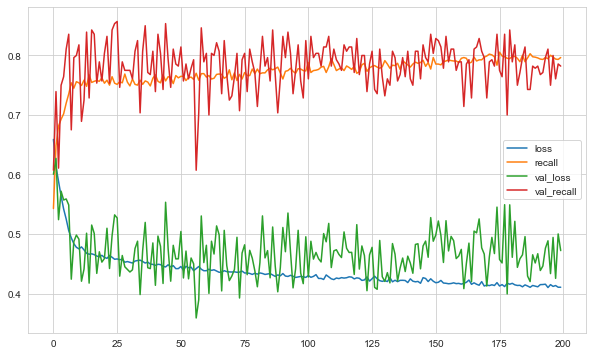

In [245]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [246]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 871us/step
[[613 183]
 [ 62 142]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       796
           1       0.44      0.70      0.54       204

    accuracy                           0.76      1000
   macro avg       0.67      0.73      0.69      1000
weighted avg       0.81      0.76      0.77      1000



### Add Dropout Layer

In [247]:
from tensorflow.keras.layers import Dropout

In [248]:
tf.random.set_seed(1)

model = Sequential()

model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
opt = Adam(lr = 0.01)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['Recall'])

In [249]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 300, class_weight=class_weights)

Epoch 1/300
60/60 [==============================] - 1s 5ms/step - loss: 0.6798 - recall: 0.5956 - val_loss: 0.6155 - val_recall: 0.5929
Epoch 2/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6480 - recall: 0.6665 - val_loss: 0.6365 - val_recall: 0.7143
Epoch 3/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6205 - recall: 0.7012 - val_loss: 0.5905 - val_recall: 0.7286
Epoch 4/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6019 - recall: 0.6703 - val_loss: 0.5934 - val_recall: 0.7786
Epoch 5/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5756 - recall: 0.6980 - val_loss: 0.5402 - val_recall: 0.7321
Epoch 6/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5698 - recall: 0.6974 - val_loss: 0.5490 - val_recall: 0.8071
Epoch 7/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5566 - recall: 0.6819 - val_loss: 0.5356 - val_recall: 0.8071
Epoch 8/300
60/60 [======================

60/60 [==============================] - 0s 2ms/step - loss: 0.5109 - recall: 0.7502 - val_loss: 0.5044 - val_recall: 0.8536
Epoch 61/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5130 - recall: 0.7077 - val_loss: 0.4657 - val_recall: 0.8286
Epoch 62/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5130 - recall: 0.7135 - val_loss: 0.4677 - val_recall: 0.8143
Epoch 63/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5117 - recall: 0.7141 - val_loss: 0.4387 - val_recall: 0.7929
Epoch 64/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5189 - recall: 0.6922 - val_loss: 0.4471 - val_recall: 0.8143
Epoch 65/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5159 - recall: 0.7238 - val_loss: 0.4305 - val_recall: 0.8179
Epoch 66/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5096 - recall: 0.7205 - val_loss: 0.5229 - val_recall: 0.8750
Epoch 67/300
60/60 [===========================

60/60 [==============================] - 0s 2ms/step - loss: 0.5099 - recall: 0.7244 - val_loss: 0.4334 - val_recall: 0.7750
Epoch 120/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5055 - recall: 0.7250 - val_loss: 0.4809 - val_recall: 0.8179
Epoch 121/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5099 - recall: 0.7399 - val_loss: 0.4860 - val_recall: 0.7929
Epoch 122/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5140 - recall: 0.7257 - val_loss: 0.5316 - val_recall: 0.8036
Epoch 123/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5113 - recall: 0.6948 - val_loss: 0.4448 - val_recall: 0.7607
Epoch 124/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5108 - recall: 0.7128 - val_loss: 0.4639 - val_recall: 0.8214
Epoch 125/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5090 - recall: 0.7289 - val_loss: 0.4538 - val_recall: 0.8000
Epoch 126/300
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.5034 - recall: 0.7199 - val_loss: 0.4898 - val_recall: 0.8250
Epoch 179/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5049 - recall: 0.7270 - val_loss: 0.4500 - val_recall: 0.7893
Epoch 180/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5045 - recall: 0.6954 - val_loss: 0.4639 - val_recall: 0.8036
Epoch 181/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5079 - recall: 0.7360 - val_loss: 0.5012 - val_recall: 0.8250
Epoch 182/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5028 - recall: 0.7186 - val_loss: 0.5012 - val_recall: 0.8536
Epoch 183/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5057 - recall: 0.7489 - val_loss: 0.4736 - val_recall: 0.8286
Epoch 184/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5068 - recall: 0.7135 - val_loss: 0.4644 - val_recall: 0.8393
Epoch 185/300
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.4995 - recall: 0.7811 - val_loss: 0.4549 - val_recall: 0.8286
Epoch 238/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5115 - recall: 0.7508 - val_loss: 0.5027 - val_recall: 0.8429
Epoch 239/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5003 - recall: 0.7527 - val_loss: 0.4764 - val_recall: 0.8357
Epoch 240/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5048 - recall: 0.7527 - val_loss: 0.4759 - val_recall: 0.8321
Epoch 241/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5050 - recall: 0.7437 - val_loss: 0.4385 - val_recall: 0.8143
Epoch 242/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5097 - recall: 0.7547 - val_loss: 0.4532 - val_recall: 0.7929
Epoch 243/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5104 - recall: 0.7263 - val_loss: 0.4367 - val_recall: 0.8000
Epoch 244/300
60/60 [====================

60/60 [==============================] - 0s 2ms/step - loss: 0.5025 - recall: 0.7238 - val_loss: 0.4916 - val_recall: 0.8214
Epoch 297/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5091 - recall: 0.7141 - val_loss: 0.4778 - val_recall: 0.8250
Epoch 298/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5043 - recall: 0.7508 - val_loss: 0.4534 - val_recall: 0.8179
Epoch 299/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5006 - recall: 0.7514 - val_loss: 0.4644 - val_recall: 0.8000
Epoch 300/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4959 - recall: 0.7424 - val_loss: 0.5014 - val_recall: 0.8357


<AxesSubplot:>

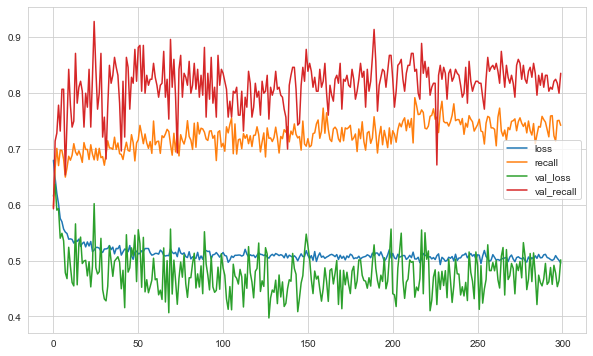

In [250]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [251]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 903us/step
[[559 237]
 [ 40 164]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       796
           1       0.41      0.80      0.54       204

    accuracy                           0.72      1000
   macro avg       0.67      0.75      0.67      1000
weighted avg       0.83      0.72      0.75      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [252]:
from tensorflow.keras.callbacks import EarlyStopping

In [253]:
tf.random.set_seed(1)

model = Sequential()

model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr = 0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['Recall'])

In [254]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [255]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 300, callbacks = [early_stop], class_weight=class_weights)

Epoch 1/300
60/60 [==============================] - 1s 5ms/step - loss: 0.6862 - recall: 0.2350 - val_loss: 0.6467 - val_recall: 0.2964
Epoch 2/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6691 - recall: 0.4495 - val_loss: 0.6162 - val_recall: 0.5929
Epoch 3/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6408 - recall: 0.6143 - val_loss: 0.6162 - val_recall: 0.6607
Epoch 4/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6154 - recall: 0.6665 - val_loss: 0.6168 - val_recall: 0.7536
Epoch 5/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5932 - recall: 0.7115 - val_loss: 0.5997 - val_recall: 0.7536
Epoch 6/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5749 - recall: 0.7025 - val_loss: 0.6329 - val_recall: 0.8071
Epoch 7/300
60/60 [==============================] - 0s 2ms/step - loss: 0.5618 - recall: 0.7154 - val_loss: 0.5570 - val_recall: 0.7286
Epoch 8/300
60/60 [======================

<AxesSubplot:>

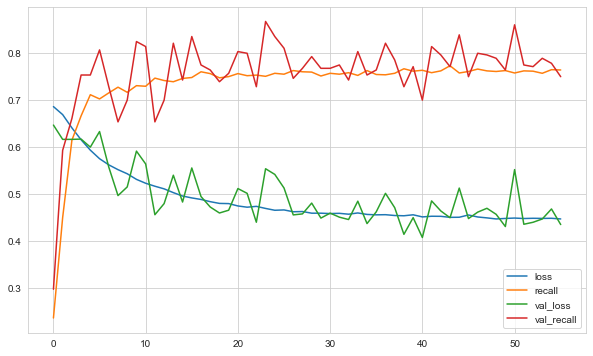

In [256]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [257]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 935us/step
[[654 142]
 [ 71 133]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       796
           1       0.48      0.65      0.56       204

    accuracy                           0.79      1000
   macro avg       0.69      0.74      0.71      1000
weighted avg       0.82      0.79      0.80      1000



#### Monitor the "val_recall" as metric

In [258]:
tf.random.set_seed(1)

model = Sequential()

model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(lr = 0.0005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['Recall'])

In [259]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 30, restore_best_weights = True)

In [260]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 300, callbacks = [early_stop], class_weight=class_weights)

Epoch 1/300
60/60 [==============================] - 1s 5ms/step - loss: 0.6892 - recall: 0.2015 - val_loss: 0.6654 - val_recall: 0.1679
Epoch 2/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6823 - recall: 0.2408 - val_loss: 0.6436 - val_recall: 0.3036
Epoch 3/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6736 - recall: 0.4507 - val_loss: 0.6265 - val_recall: 0.5107
Epoch 4/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6578 - recall: 0.5551 - val_loss: 0.6251 - val_recall: 0.6357
Epoch 5/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6381 - recall: 0.6098 - val_loss: 0.6253 - val_recall: 0.6607
Epoch 6/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6229 - recall: 0.6639 - val_loss: 0.6286 - val_recall: 0.7429
Epoch 7/300
60/60 [==============================] - 0s 2ms/step - loss: 0.6096 - recall: 0.7083 - val_loss: 0.6027 - val_recall: 0.7214
Epoch 8/300
60/60 [======================

60/60 [==============================] - 0s 2ms/step - loss: 0.4570 - recall: 0.7721 - val_loss: 0.5150 - val_recall: 0.8429
Epoch 61/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4540 - recall: 0.7656 - val_loss: 0.4635 - val_recall: 0.8179
Epoch 62/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4545 - recall: 0.7682 - val_loss: 0.4400 - val_recall: 0.7750
Epoch 63/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4541 - recall: 0.7682 - val_loss: 0.4637 - val_recall: 0.8250
Epoch 64/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4562 - recall: 0.7663 - val_loss: 0.4339 - val_recall: 0.7679
Epoch 65/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4525 - recall: 0.7643 - val_loss: 0.4612 - val_recall: 0.8143
Epoch 66/300
60/60 [==============================] - 0s 2ms/step - loss: 0.4509 - recall: 0.7663 - val_loss: 0.5206 - val_recall: 0.8536
Epoch 67/300
60/60 [===========================

<AxesSubplot:>

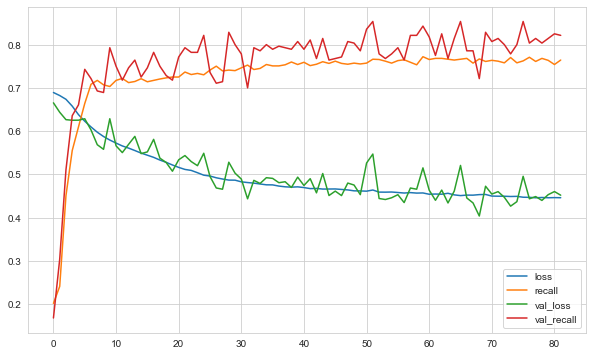

In [261]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [262]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 871us/step
[[524 272]
 [ 34 170]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.77       796
           1       0.38      0.83      0.53       204

    accuracy                           0.69      1000
   macro avg       0.66      0.75      0.65      1000
weighted avg       0.83      0.69      0.72      1000



## GridSearchCV

In [263]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [264]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [265]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(1)
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 5, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [266]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 40, restore_best_weights = True)

In [267]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64, 128],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.0005, 0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Epoch 1/200
64/64 [==============================] - 2s 24ms/step - loss: 0.4733 - recall: 0.0159 - val_loss: 0.4657 - val_recall: 0.0761
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4399 - recall: 0.1057 - val_loss: 0.4519 - val_recall: 0.3046
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.4196 - recall: 0.2200 - val_loss: 0.4215 - val_recall: 0.1827
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3961 - recall: 0.3075 - val_loss: 0.4316 - val_recall: 0.1371
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3720 - recall: 0.3802 - val_loss: 0.4102 - val_recall: 0.3858
Epoch 6/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3645 - recall: 0.4138 - val_loss: 0.3963 - val_recall: 0.2589
Epoch 7/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3583 - recall: 0.4169 - val_loss: 0.370

Epoch 60/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3218 - recall: 0.4982 - val_loss: 0.3410 - val_recall: 0.4467
Epoch 61/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3217 - recall: 0.4945 - val_loss: 0.3556 - val_recall: 0.4061
Epoch 62/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3211 - recall: 0.4847 - val_loss: 0.3841 - val_recall: 0.6294
Epoch 63/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3219 - recall: 0.5024 - val_loss: 0.3493 - val_recall: 0.4721
Epoch 64/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3201 - recall: 0.4969 - val_loss: 0.3636 - val_recall: 0.6142
Epoch 65/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3198 - recall: 0.5006 - val_loss: 0.3744 - val_recall: 0.4416
Epoch 66/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3213 - recall: 0.4951 - val_loss: 0.3475 - val_recall: 0.4619
Epoch 67/200
64/64 [==============

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000016F1F3482B0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128],
                         'learn_rate': [0.0005, 0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [268]:
grid_model.best_score_

0.6219124906274095

In [269]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [270]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
45,0.622,0.048,1,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
9,0.616,0.043,2,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
41,0.613,0.046,3,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
29,0.612,0.035,4,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
25,0.601,0.040,5,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
13,0.597,0.035,6,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
21,0.587,0.050,7,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
24,0.584,0.027,8,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
31,0.579,0.036,9,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
11,0.577,0.022,10,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [271]:
y_pred = grid_model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[667 129]
 [ 73 131]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       796
           1       0.50      0.64      0.56       204

    accuracy                           0.80      1000
   macro avg       0.70      0.74      0.72      1000
weighted avg       0.82      0.80      0.81      1000



In [284]:
y_test

4866    0
3106    0
7771    0
9428    0
916     1
       ..
8430    0
598     1
374     0
4197    1
1014    0
Name: Exited, Length: 1000, dtype: int64

32/32 [==============================] - 0s 936us/step


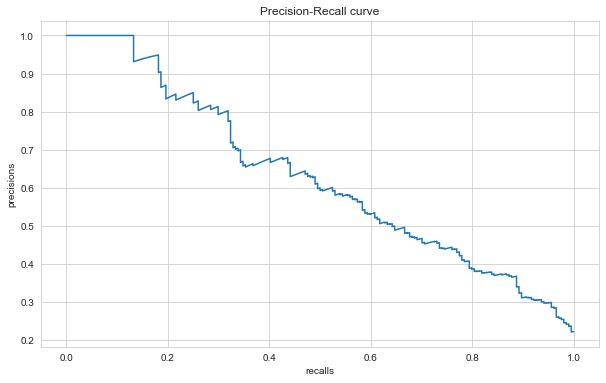

In [286]:
y_pred_proba = grid_model.predict_proba(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

# Final Model and Model Deployment

In [297]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [287]:
tf.random.set_seed(1)

model = Sequential()

model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['Recall'])

In [288]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 30, restore_best_weights = True)

In [289]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 300, callbacks = [early_stop], class_weight=class_weights)

Epoch 1/300
71/71 [==============================] - 1s 4ms/step - loss: 0.6900 - recall: 0.0933 - val_loss: 0.6658 - val_recall: 0.2500
Epoch 2/300
71/71 [==============================] - 0s 2ms/step - loss: 0.6816 - recall: 0.2864 - val_loss: 0.6472 - val_recall: 0.4559
Epoch 3/300
71/71 [==============================] - 0s 2ms/step - loss: 0.6651 - recall: 0.5619 - val_loss: 0.6269 - val_recall: 0.5735
Epoch 4/300
71/71 [==============================] - 0s 2ms/step - loss: 0.6422 - recall: 0.6154 - val_loss: 0.6122 - val_recall: 0.5637
Epoch 5/300
71/71 [==============================] - 0s 2ms/step - loss: 0.6247 - recall: 0.6585 - val_loss: 0.6112 - val_recall: 0.6471
Epoch 6/300
71/71 [==============================] - 0s 2ms/step - loss: 0.6102 - recall: 0.7065 - val_loss: 0.5914 - val_recall: 0.6569
Epoch 7/300
71/71 [==============================] - 0s 2ms/step - loss: 0.5966 - recall: 0.6907 - val_loss: 0.6303 - val_recall: 0.7353
Epoch 8/300
71/71 [======================

71/71 [==============================] - 0s 2ms/step - loss: 0.4548 - recall: 0.7632 - val_loss: 0.5288 - val_recall: 0.7745
Epoch 61/300
71/71 [==============================] - 0s 2ms/step - loss: 0.4541 - recall: 0.7681 - val_loss: 0.4988 - val_recall: 0.7549
Epoch 62/300
71/71 [==============================] - 0s 2ms/step - loss: 0.4517 - recall: 0.7610 - val_loss: 0.4900 - val_recall: 0.7402
Epoch 63/300
71/71 [==============================] - 0s 2ms/step - loss: 0.4516 - recall: 0.7698 - val_loss: 0.4754 - val_recall: 0.6912
Epoch 64/300
71/71 [==============================] - 0s 1ms/step - loss: 0.4519 - recall: 0.7687 - val_loss: 0.4838 - val_recall: 0.7206
Epoch 65/300
71/71 [==============================] - 0s 1ms/step - loss: 0.4507 - recall: 0.7654 - val_loss: 0.4968 - val_recall: 0.7451
Epoch 66/300
71/71 [==============================] - 0s 2ms/step - loss: 0.4509 - recall: 0.7545 - val_loss: 0.5422 - val_recall: 0.7843
Epoch 67/300
71/71 [===========================

<AxesSubplot:>

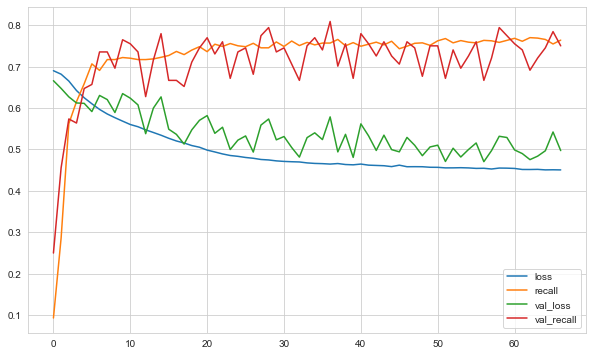

In [290]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [291]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5785219073295593
recall :  0.8088235259056091


In [292]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[545 251]
 [ 39 165]]
              precision    recall  f1-score   support

           0       0.93      0.68      0.79       796
           1       0.40      0.81      0.53       204

    accuracy                           0.71      1000
   macro avg       0.66      0.75      0.66      1000
weighted avg       0.82      0.71      0.74      1000



In [298]:
model.save('model_cancer.h5')

## Prediction

In [293]:
exited_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
exited_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0


In [294]:
exited_customer = scaler.transform(exited_customer)
exited_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50678999, 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [295]:
(model.predict(exited_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 16ms/step


array([[1]])

In [296]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___